In [1]:
!pip install fredapi
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
from fredapi import Fred

fred_key = '975e997211d19b97a97af00b9cba5c43'
fred = Fred(api_key=fred_key)

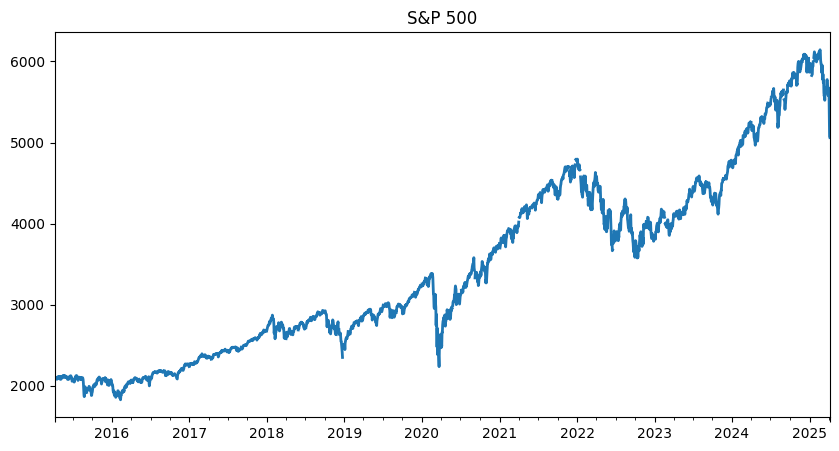

In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [36]:
sp500_df = pd.DataFrame(sp500)
sp500_df

,0
2015-04-08,2081.90
2015-04-09,2091.18
2015-04-10,2102.06
2015-04-13,2092.43
2015-04-14,2095.84
...,...
2025-04-01,5633.07
2025-04-02,5670.97
2025-04-03,5396.52
2025-04-04,5074.08


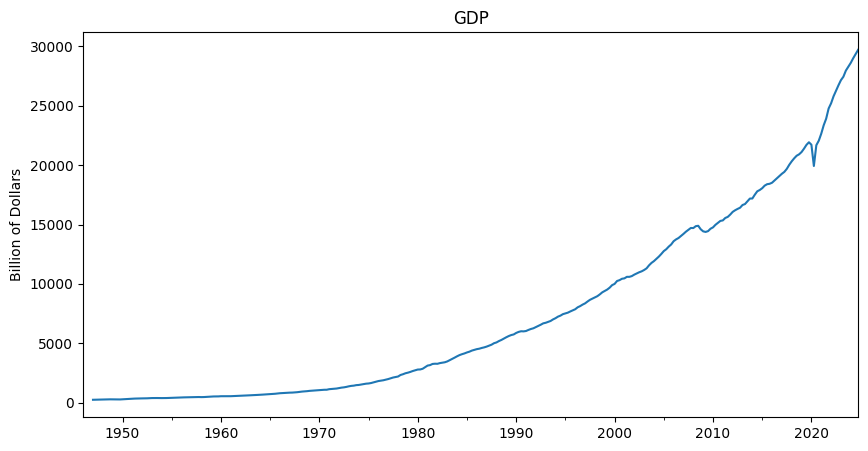

In [19]:
gdp = fred.get_series('GDP')
gdp.plot(figsize=(10,5), title='GDP')
plt.ylabel("Billion of Dollars")
plt.show()

In [37]:
gdp_df = pd.DataFrame(gdp)
gdp_df

,0
1946-01-01,NaN
1946-04-01,NaN
1946-07-01,NaN
1946-10-01,NaN
1947-01-01,243.164
...,...
2023-10-01,28296.967
2024-01-01,28624.069
2024-04-01,29016.714
2024-07-01,29374.914


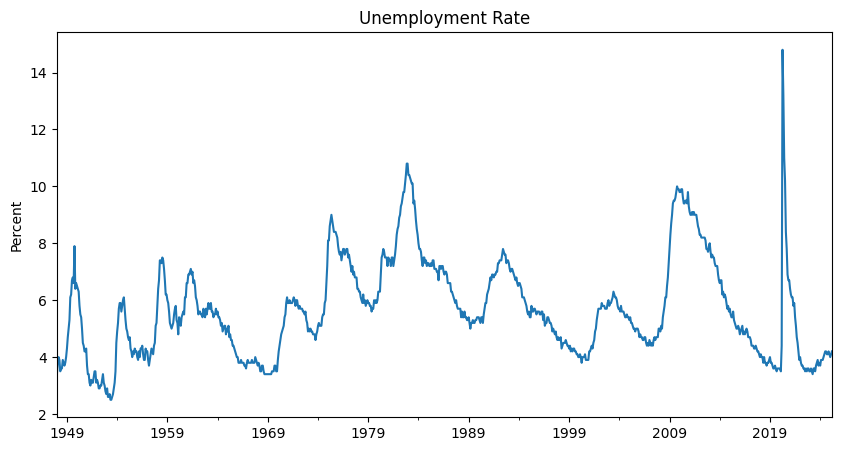

In [23]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(10,5), title='Unemployment Rate')
plt.ylabel("Percent")
plt.show()

In [38]:
unrate_df = pd.DataFrame(unrate)
unrate_df

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-11-01,4.2
2024-12-01,4.1
2025-01-01,4.0
2025-02-01,4.1


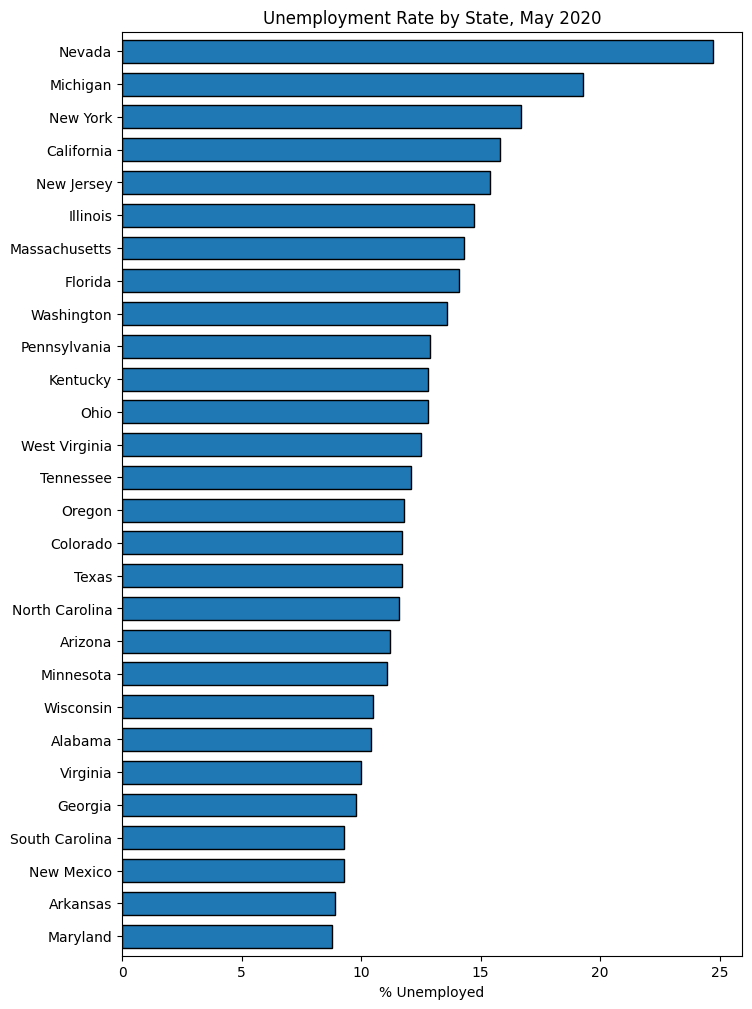

In [42]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

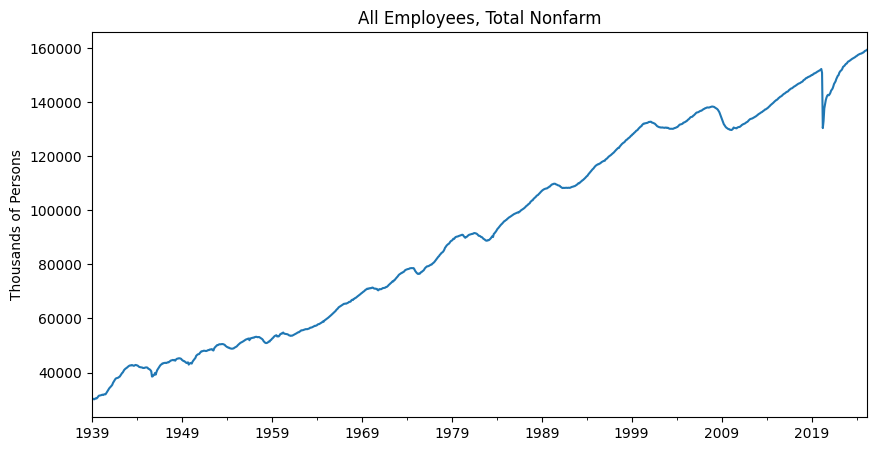

In [31]:
nonfarm = fred.get_series('PAYEMS')
nonfarm.plot(figsize=(10,5), title='All Employees, Total Nonfarm')
plt.ylabel("Thousands of Persons")
plt.show()

In [40]:
nonfarm_df = pd.DataFrame(nonfarm)
nonfarm_df

,0
1939-01-01,29923.0
1939-02-01,30100.0
1939-03-01,30280.0
1939-04-01,30094.0
1939-05-01,30299.0
...,...
2024-11-01,158619.0
2024-12-01,158942.0
2025-01-01,159053.0
2025-02-01,159170.0
